# FDN Reverberator - DAAP Project

Students: 

*   Federico Maver ( ID: 10565151, MATR: 952840 )
*   Filippo Gualtieri ( ID: 10557065, MATR: 953546 )

In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import librosa, librosa.display
import scipy as sp
import IPython.display as ipd

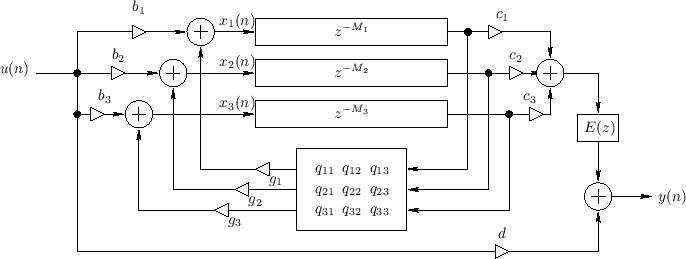

In [16]:
ipd.Image(filename = "images/FDNScheme.png")

## Params

In [54]:
fs = 22050
N = 4
g = np.ones(N) # cambia come vuoi
t60 = 1 # reverberation time

M_min = int(np.ceil(0.15*t60*fs))
print(M_min)

3308


In [61]:
primeN = []
for num in range(2,101):
    prime = True
    for i in range(2,num):
        if (num%i==0):
            prime = False
    if prime:
       primeN.append(num)

M = []
for i in primeN:
    m = np.floor(0.5+np.log(M_min)/np.log(i))
    if i**m>M_min:
        M.append(int(i**m))

M = np.sort(M)

M = M[:N]

print(M)

[3481 3721 4096 4489]


## Lossless Feedback Matrix

Hadamard Matrix

In [21]:
if((N & (N-1) == 0) and N != 0):
    Had = 1/np.sqrt(N)*sp.linalg.hadamard(N)
    print(Had)


[[ 0.5  0.5  0.5  0.5]
 [ 0.5 -0.5  0.5 -0.5]
 [ 0.5  0.5 -0.5 -0.5]
 [ 0.5 -0.5 -0.5  0.5]]


Householder Matrix

In [11]:
u = np.ones(N)
Hous = np.identity(N)-2/N*u*u.T
print(Hous)

[[ 0.5 -0.5 -0.5 -0.5]
 [-0.5  0.5 -0.5 -0.5]
 [-0.5 -0.5  0.5 -0.5]
 [-0.5 -0.5 -0.5  0.5]]


## Delay IR

In [83]:
u = [1, 0, 0, 0]


D = np.zeros((N, M[-1]+len(u)))

for i in range(N):
    D[i, M[i]-1] = 1

